In [1]:
import importlib
import tensorflow as tf
from evaluation import repeat_experiment

import dataset_creation 
importlib.reload(dataset_creation)

#import ensembles
#importlib.reload(ensembles)

import networks
importlib.reload(networks)
from evaluation import repeat_experiment

import dataset_creation 
importlib.reload(dataset_creation)

import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [15, 5]
%matplotlib inline


from ensembles import BootstrapThroughTimeBobStrap,BootstrapEnsemble, ForcedDiversityBootstrapThroughTime3

from base import EnsembleNetwork
from networks import DropoutNetwork, NlpdNetwork, LrNetwork

# Linear

In [2]:
num_meta_epochs = 3#100#100#10
num_epochs = 10#15#0#50#15#5#25#50
seed = 50#42#45#42

num_samples = 200
dataset_params = {'seed':seed,'num_samples':num_samples}

learning_rate = None#1/num_epochs
num_neurons = [10, 10, 10]
num_neurons_nonlinear = [10,10,10,10,5]
activations = [tf.nn.leaky_relu]*len(num_neurons)
activations_nonlinear = [tf.nn.leaky_relu]*len(num_neurons_nonlinear)

model_params = {'initialisation_scheme':tf.keras.initializers.he_normal,
                'activations':activations,'num_neurons':num_neurons,'learning_rate':learning_rate,'l2':True}#{'num_epochs':num_epochs,'seed':seed,'learning_rate':learning_rate,'initialisation_scheme':tf.keras.initializers.he_normal}



experiment started at 2018-08-09 12:52:40.990055
experiment number 1 took 6.865815162658691 seconds. That means the whole run will probably take 20.597445487976074 more seconds and 0.3432907581329346 more minutes.
overall, it took 20.860074043273926 seconds with 3 experiments
         cobeau  coverage      nlpd      rsme
count  3.000000  3.000000  3.000000  3.000000
mean   0.361035  0.744444  0.902480  0.014871
std    0.390396  0.091793  0.019188  0.004200
min    0.135638  0.683333  0.890593  0.010022
25%    0.135640  0.691667  0.891412  0.013635
50%    0.135641  0.700000  0.892231  0.017248
75%    0.473734  0.775000  0.908424  0.017296
max    0.811826  0.850000  0.924616  0.017345
\begin{tabular}{lrrrr}
\toprule
{} &    cobeau &  coverage &      nlpd &      rsme \\
\midrule
count &  3.000000 &  3.000000 &  3.000000 &  3.000000 \\
mean  &  0.361035 &  0.744444 &  0.902480 &  0.014871 \\
std   &  0.390396 &  0.091793 &  0.019188 &  0.004200 \\
min   &  0.135638 &  0.683333 &  0.890593 &

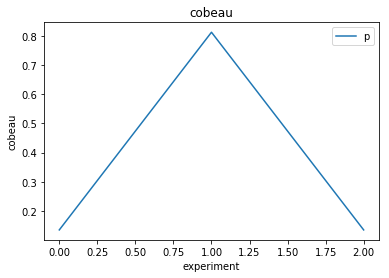

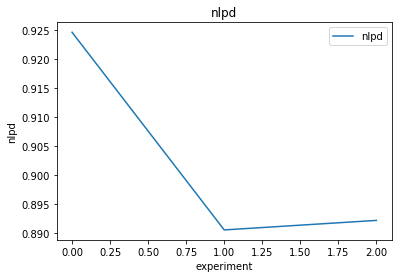

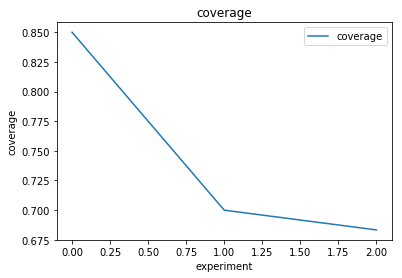

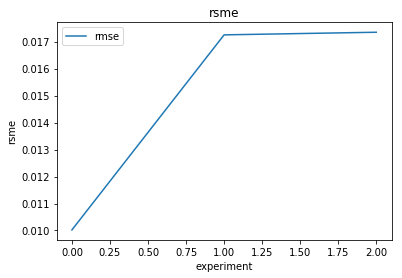

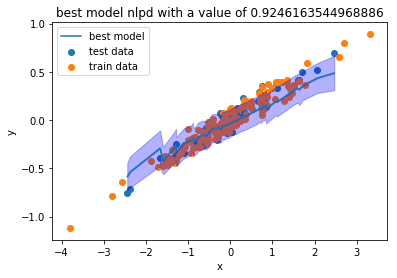

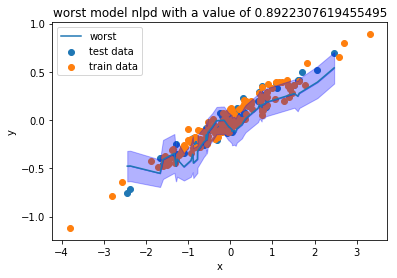

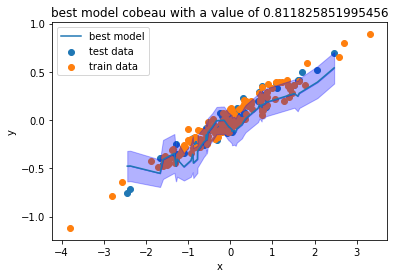

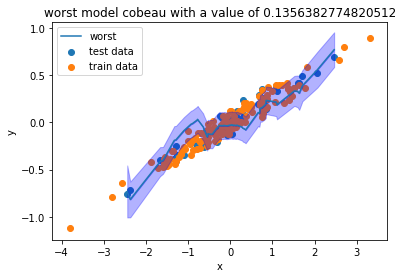

In [3]:
pd = repeat_experiment(DropoutNetwork, dataset_creation.LinearDataset,
                       num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-09 12:53:05.782138
experiment number 1 took 8.62749695777893 seconds. That means the whole run will probably take 25.882490873336792 more seconds and 0.43137484788894653 more minutes.
overall, it took 34.44618272781372 seconds with 3 experiments
             cobeau  coverage      nlpd      rsme
count  3.000000e+00  3.000000  3.000000  3.000000
mean   3.234893e-01  0.072222  1.262372  0.043811
std    3.005309e-01  0.067358  1.214279  0.065559
min    8.516254e-13  0.000000 -0.138588  0.005434
25%    1.882230e-01  0.041667  0.887345  0.005961
50%    3.764459e-01  0.083333  1.913277  0.006488
75%    4.852339e-01  0.108333  1.962852  0.062999
max    5.940219e-01  0.133333  2.012427  0.119510
\begin{tabular}{lrrrr}
\toprule
{} &        cobeau &  coverage &      nlpd &      rsme \\
\midrule
count &  3.000000e+00 &  3.000000 &  3.000000 &  3.000000 \\
mean  &  3.234893e-01 &  0.072222 &  1.262372 &  0.043811 \\
std   &  3.005309e-01 &  0.067358 &  1.214279 &  0.06

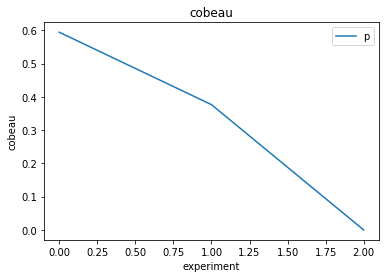

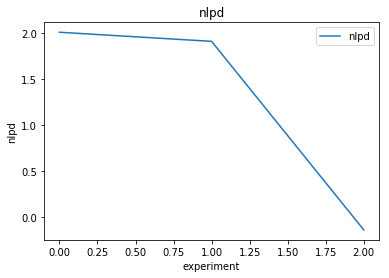

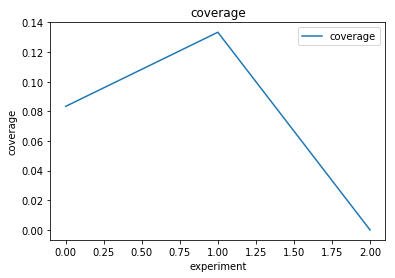

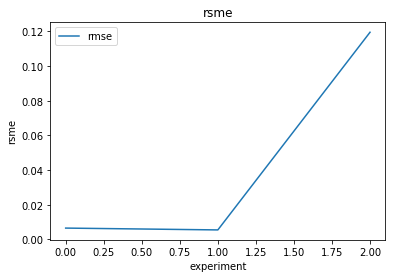

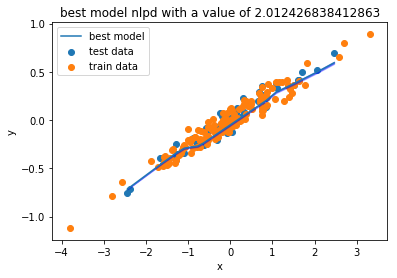

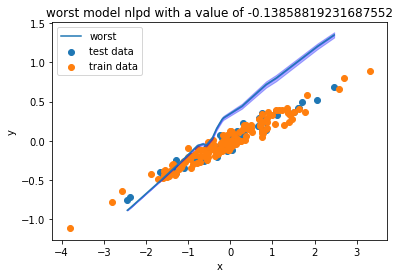

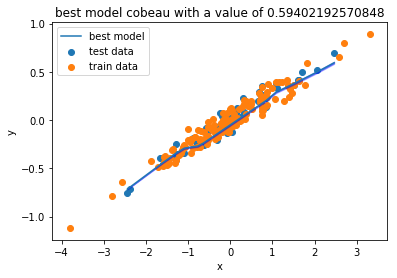

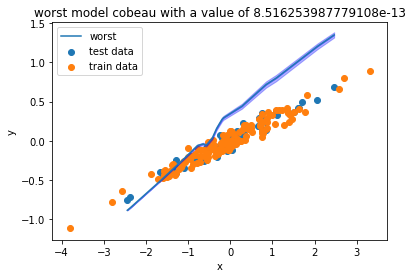

In [4]:
pd1 = repeat_experiment(NlpdNetwork, dataset_creation.LinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-09 12:53:49.072552
experiment number 1 took 14.637756824493408 seconds. That means the whole run will probably take 43.913270473480225 more seconds and 0.7318878412246704 more minutes.
overall, it took 37.158124685287476 seconds with 3 experiments
         cobeau  coverage      nlpd      rsme
count  3.000000  3.000000  3.000000  3.000000
mean   0.368483  0.077778  1.904635  0.006879
std    0.129468  0.019245  0.028926  0.002071
min    0.230554  0.066667  1.877933  0.004624
25%    0.309033  0.066667  1.889271  0.005972
50%    0.387512  0.066667  1.900609  0.007321
75%    0.437448  0.083333  1.917986  0.008007
max    0.487383  0.100000  1.935363  0.008693
\begin{tabular}{lrrrr}
\toprule
{} &    cobeau &  coverage &      nlpd &      rsme \\
\midrule
count &  3.000000 &  3.000000 &  3.000000 &  3.000000 \\
mean  &  0.368483 &  0.077778 &  1.904635 &  0.006879 \\
std   &  0.129468 &  0.019245 &  0.028926 &  0.002071 \\
min   &  0.230554 &  0.066667 &  1.877933 

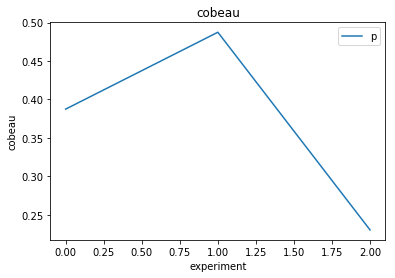

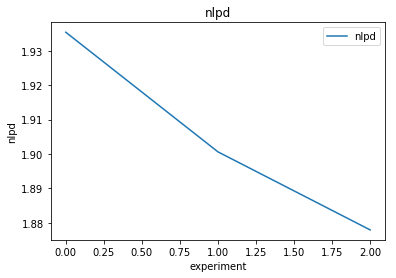

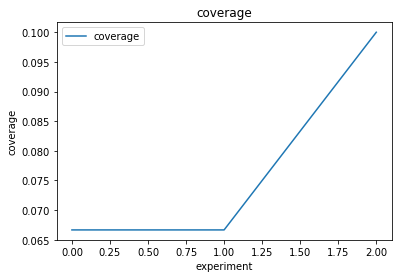

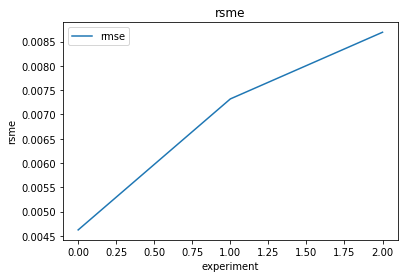

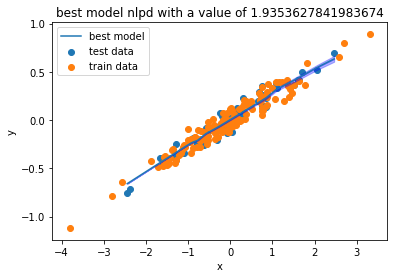

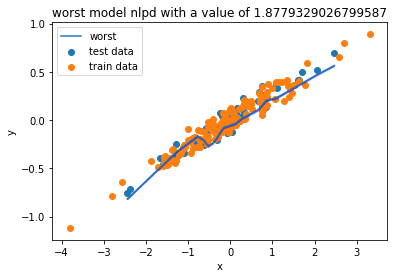

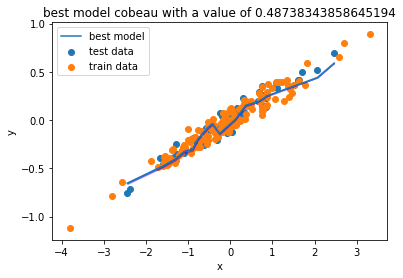

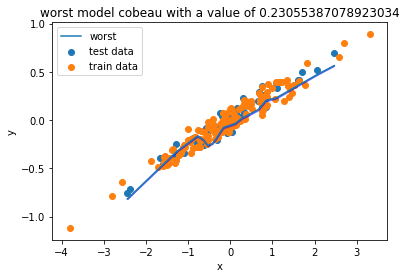

In [5]:
pd2 = repeat_experiment(LrNetwork, dataset_creation.LinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

# Nonlinear


In [6]:
#num_meta_epochs = 5#10
#num_epochs = 10#15#50 #10
seed = 42+42

model_params = {'num_epochs':num_epochs,'seed':seed,'num_neurons':num_neurons_nonlinear}#[5,5,5]}#

dataset_params = {'num_samples':num_samples,'seed':seed}

learning_rate = None#1/num_epochs
model_params = {'initialisation_scheme':tf.keras.initializers.he_normal,
                'num_epochs':num_epochs,'seed':seed,'learning_rate':learning_rate,
                'activations':activations_nonlinear,
                'l2':True
               }#{'num_epochs':num_epochs,'learning_rate':learning_rate,'initialisation_scheme':tf.keras.initializers.he_normal}
importlib.reload(dataset_creation)

<module 'dataset_creation' from '/Users/thomas/Documents/Master-Thesis/new_version/dataset_creation.py'>

experiment started at 2018-08-09 12:54:32.732110
experiment number 1 took 11.74347186088562 seconds. That means the whole run will probably take 35.23041558265686 more seconds and 0.587173593044281 more minutes.
overall, it took 45.21465802192688 seconds with 3 experiments
         cobeau  coverage      nlpd      rsme
count  3.000000  3.000000  3.000000  3.000000
mean   0.342886  0.138889 -0.036481  0.296658
std    0.300322  0.058531  0.350749  0.103946
min    0.001789  0.083333 -0.425374  0.211102
25%    0.230532  0.108333 -0.182686  0.238818
50%    0.459276  0.133333  0.060003  0.266534
75%    0.513434  0.166667  0.157965  0.339436
max    0.567592  0.200000  0.255927  0.412339
\begin{tabular}{lrrrr}
\toprule
{} &    cobeau &  coverage &      nlpd &      rsme \\
\midrule
count &  3.000000 &  3.000000 &  3.000000 &  3.000000 \\
mean  &  0.342886 &  0.138889 & -0.036481 &  0.296658 \\
std   &  0.300322 &  0.058531 &  0.350749 &  0.103946 \\
min   &  0.001789 &  0.083333 & -0.425374 &  0

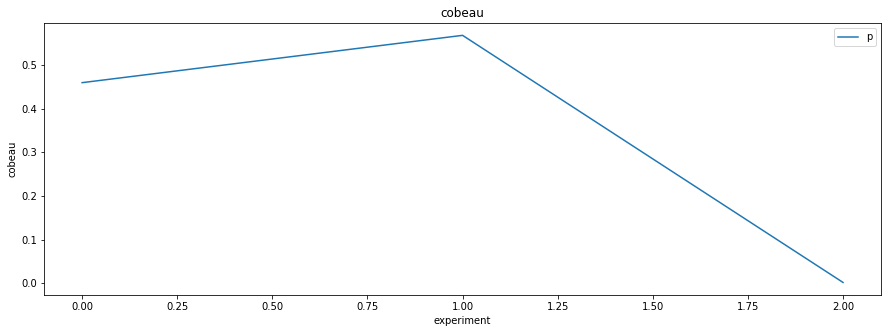

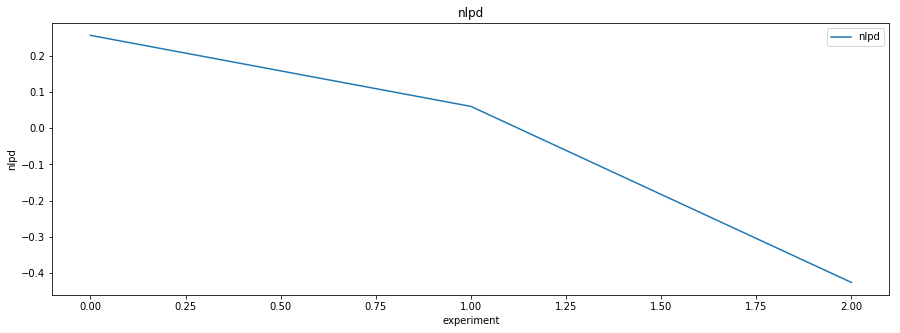

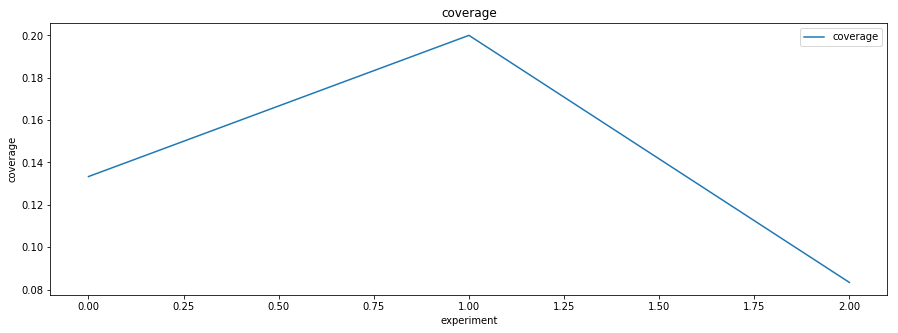

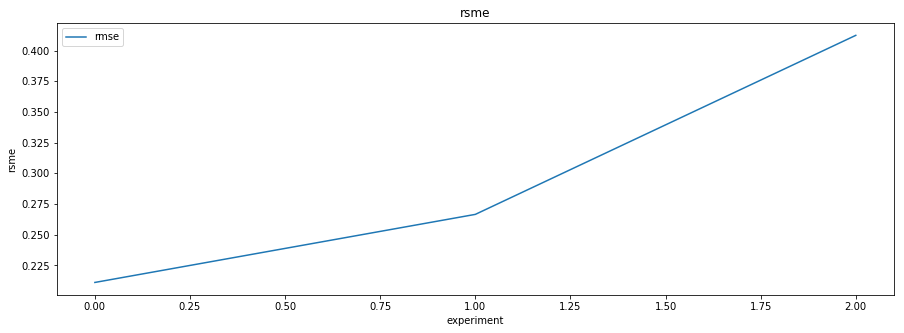

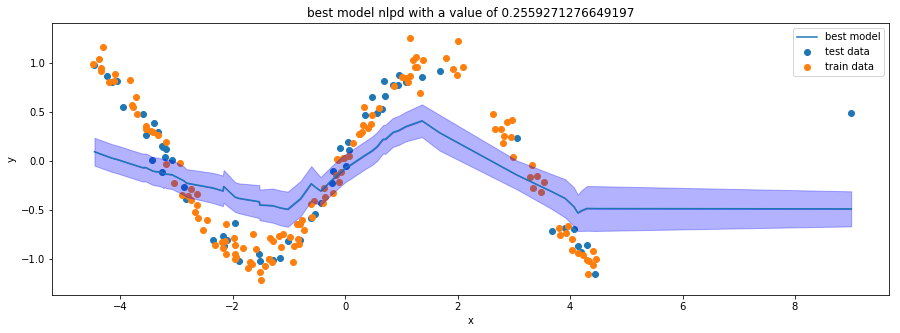

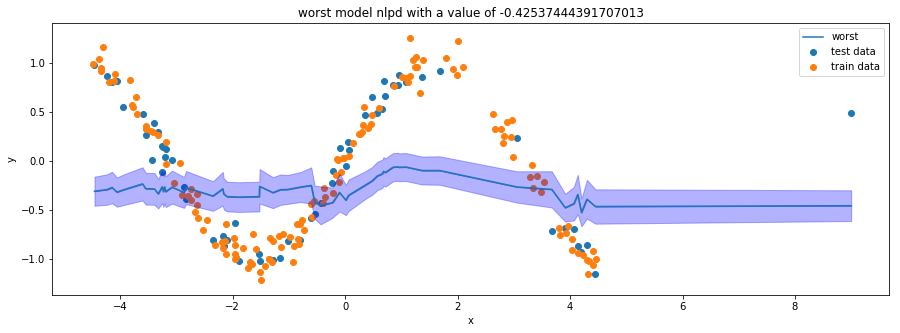

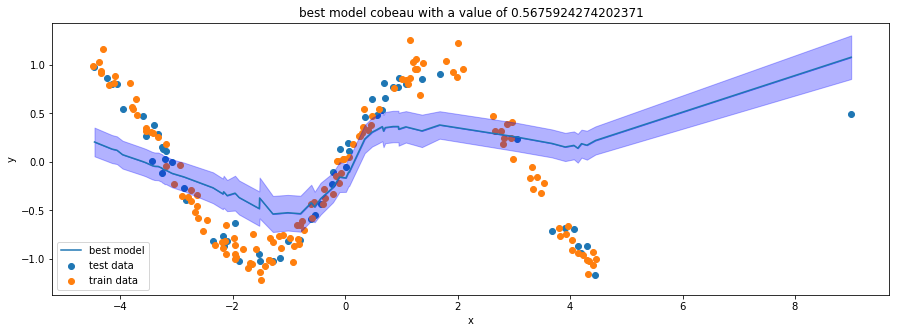

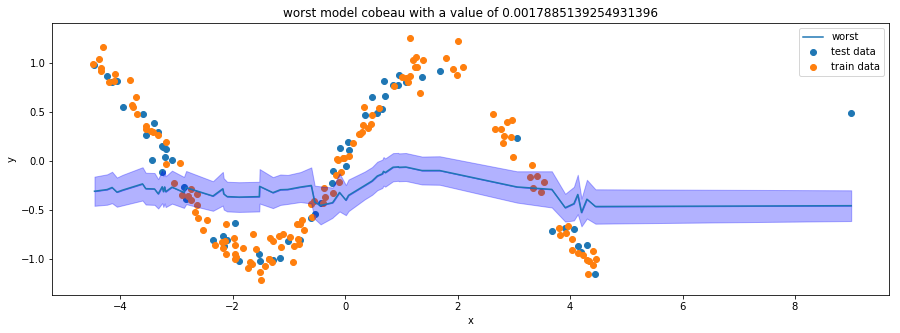

In [7]:
pd11 = repeat_experiment(DropoutNetwork, dataset_creation.NonlinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-09 12:55:33.284500
experiment number 1 took 19.34872817993164 seconds. That means the whole run will probably take 58.04618453979492 more seconds and 0.967436408996582 more minutes.
overall, it took 52.388092279434204 seconds with 3 experiments
             cobeau  coverage      nlpd      rsme
count  3.000000e+00  3.000000  3.000000  3.000000
mean   2.991659e-03  0.422222  0.040386  0.550269
std    5.181705e-03  0.134715  0.676680  0.663445
min    9.148324e-35  0.300000 -0.476258  0.094601
25%    1.491387e-11  0.350000 -0.342598  0.169690
50%    2.982773e-11  0.400000 -0.208938  0.244778
75%    4.487488e-03  0.483333  0.298708  0.778103
max    8.974976e-03  0.566667  0.806355  1.311427
\begin{tabular}{lrrrr}
\toprule
{} &        cobeau &  coverage &      nlpd &      rsme \\
\midrule
count &  3.000000e+00 &  3.000000 &  3.000000 &  3.000000 \\
mean  &  2.991659e-03 &  0.422222 &  0.040386 &  0.550269 \\
std   &  5.181705e-03 &  0.134715 &  0.676680 &  0.663

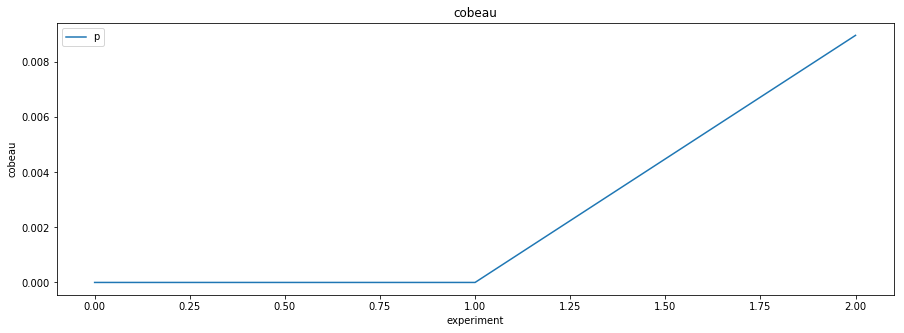

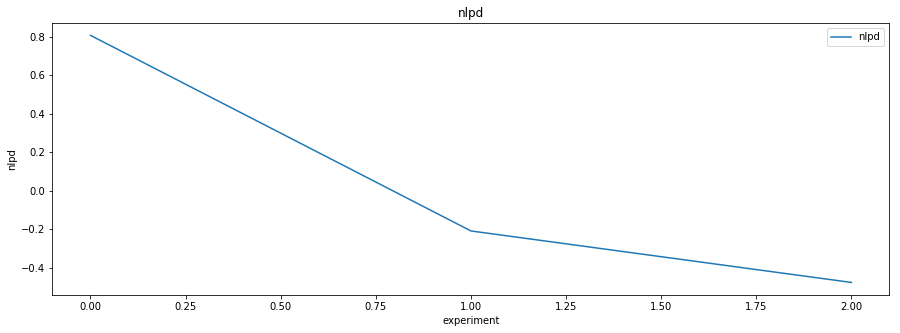

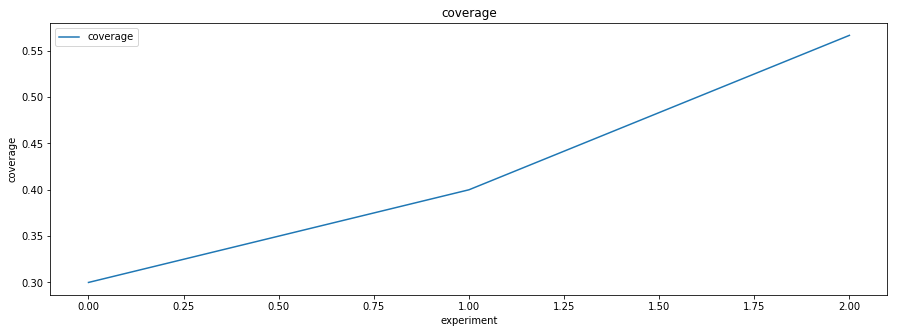

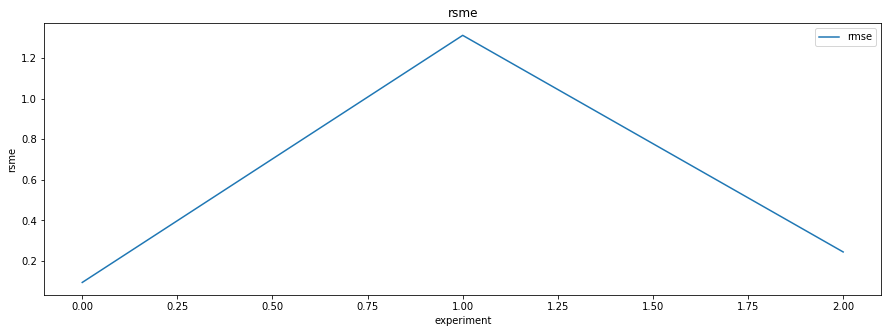

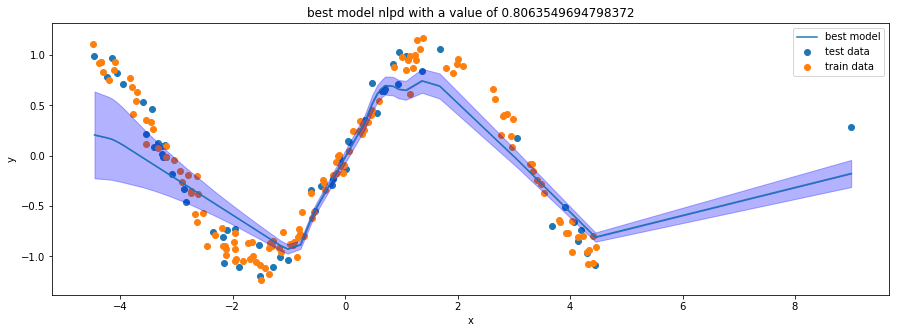

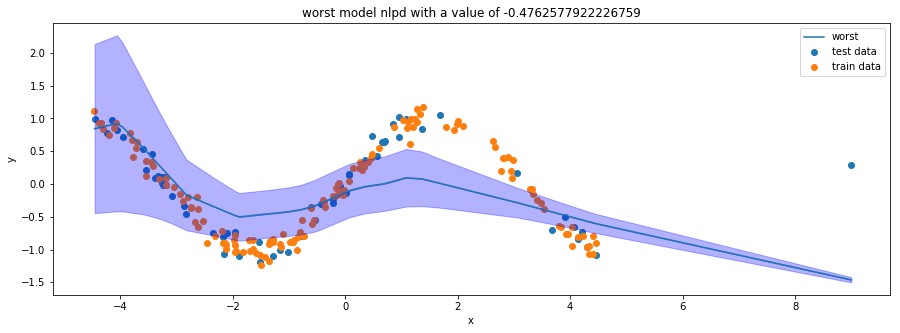

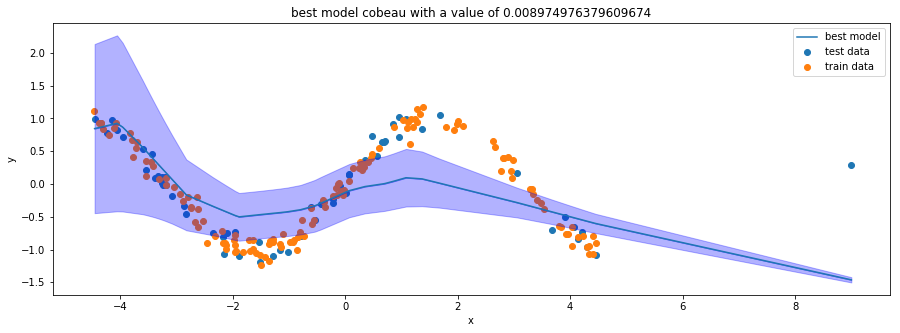

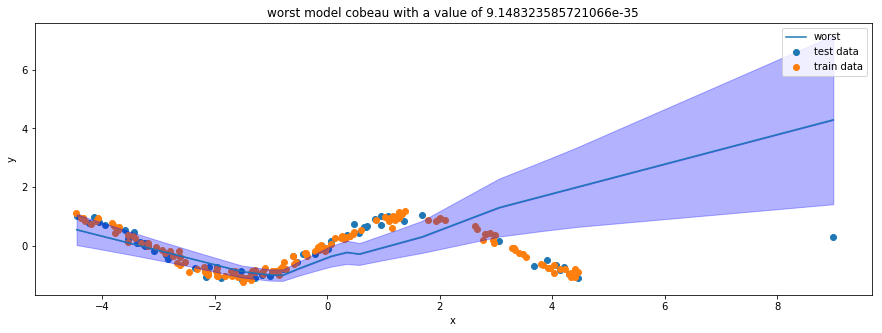

In [8]:
pd22 = repeat_experiment(NlpdNetwork, dataset_creation.NonlinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-09 12:56:35.447482
experiment number 1 took 20.753623008728027 seconds. That means the whole run will probably take 62.26086902618408 more seconds and 1.0376811504364014 more minutes.
overall, it took 47.502002000808716 seconds with 3 experiments
         cobeau  coverage       nlpd      rsme
count  3.000000  3.000000   3.000000  3.000000
mean   0.456013  0.255556 -17.515214  0.229118
std    0.206764  0.063099  30.540133  0.112524
min    0.230421  0.183333 -52.779049  0.134225
25%    0.365768  0.233333 -26.438612  0.166963
50%    0.501115  0.283333  -0.098175  0.199701
75%    0.568809  0.291667   0.116703  0.276565
max    0.636503  0.300000   0.331581  0.353430
\begin{tabular}{lrrrr}
\toprule
{} &    cobeau &  coverage &       nlpd &      rsme \\
\midrule
count &  3.000000 &  3.000000 &   3.000000 &  3.000000 \\
mean  &  0.456013 &  0.255556 & -17.515214 &  0.229118 \\
std   &  0.206764 &  0.063099 &  30.540133 &  0.112524 \\
min   &  0.230421 &  0.183333 

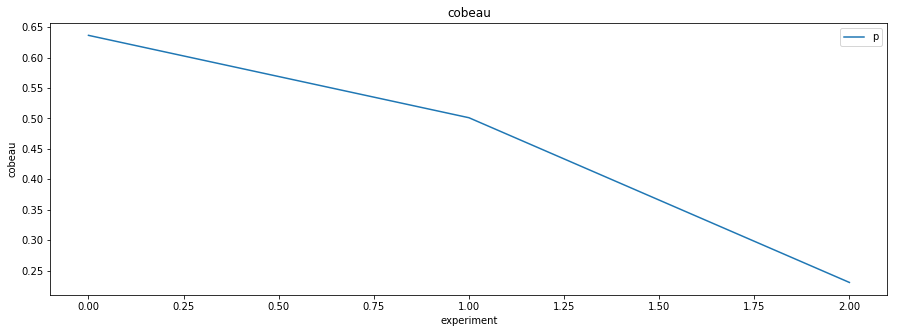

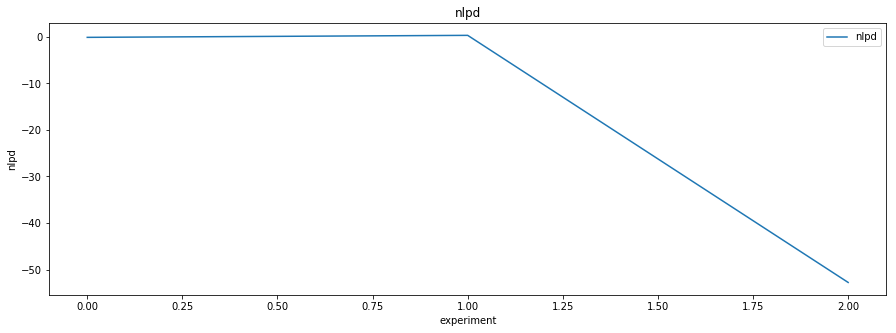

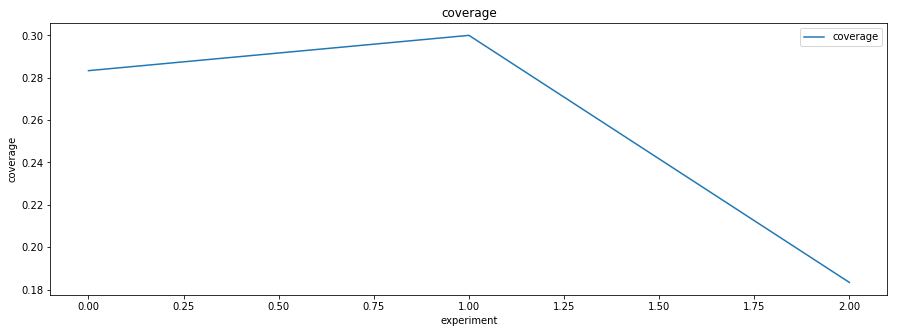

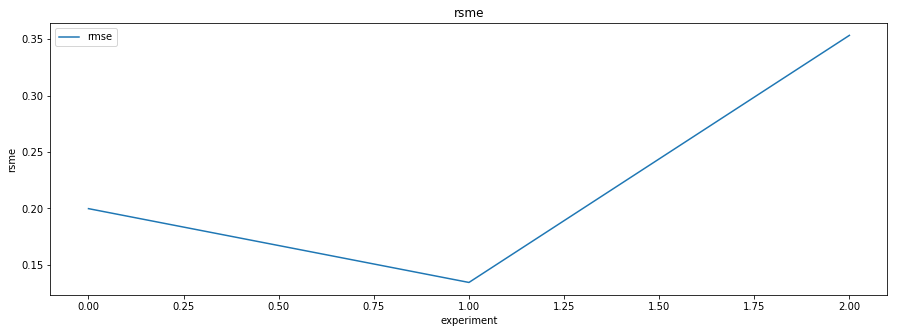

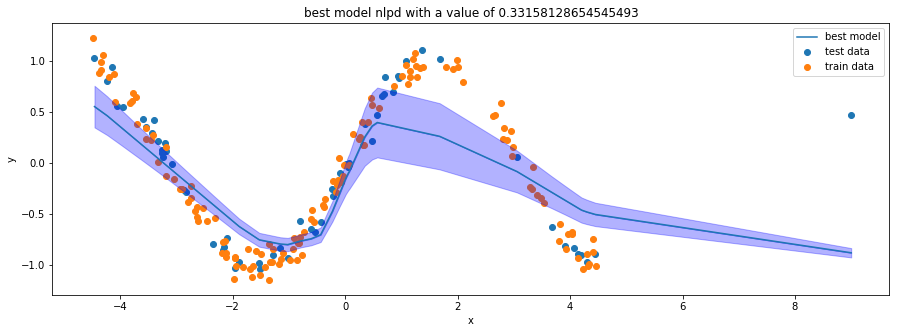

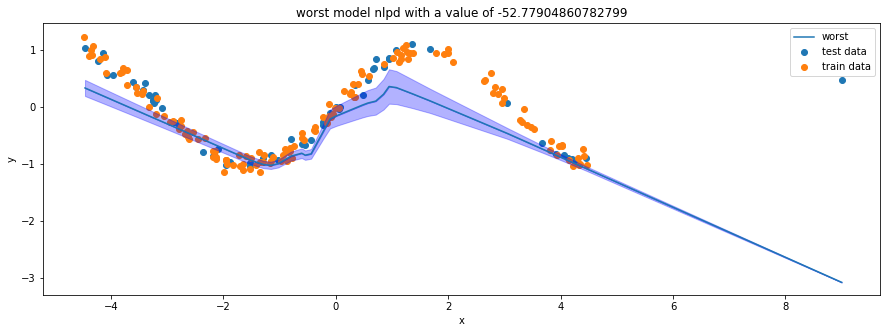

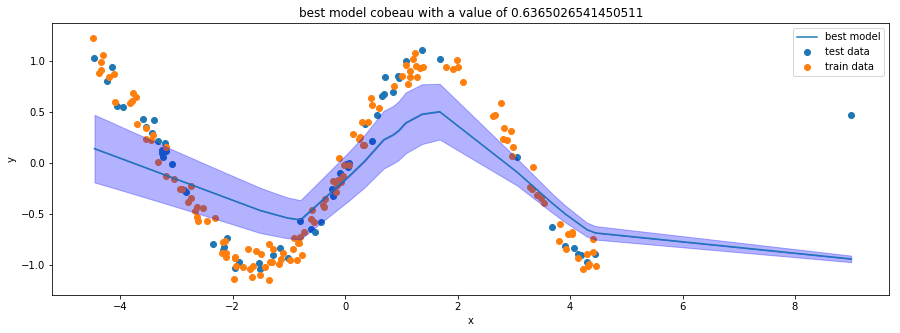

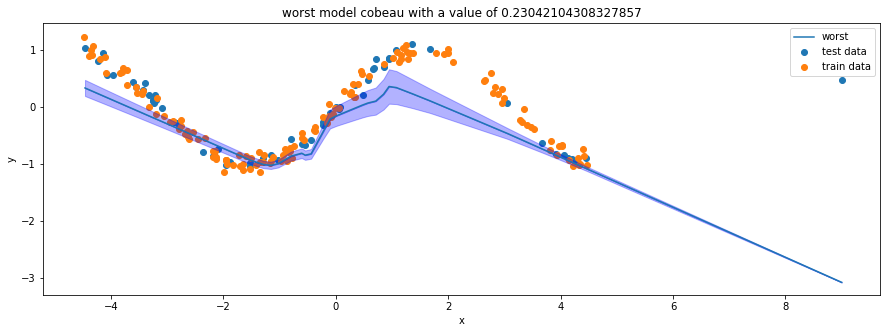

In [9]:
pd33 = repeat_experiment(LrNetwork, dataset_creation.NonlinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

# X3

In [10]:
importlib.reload(dataset_creation)

dataset_params = {'seed':seed,'num_samples':num_samples,'scope':7}


experiment started at 2018-08-09 12:57:31.153951
experiment number 1 took 10.657514095306396 seconds. That means the whole run will probably take 31.97254228591919 more seconds and 0.5328757047653199 more minutes.
overall, it took 30.53915309906006 seconds with 3 experiments
             cobeau  coverage        nlpd        rsme
count  3.000000e+00  3.000000    3.000000    3.000000
mean   2.854229e-04  0.807910 -129.397911  277.937542
std    4.229723e-04  0.019571   48.779188   17.823102
min    1.253024e-07  0.796610 -160.070223  257.774608
25%    4.244516e-05  0.796610 -157.522138  271.111098
50%    8.476502e-05  0.796610 -154.974053  284.447587
75%    4.280717e-04  0.813559 -114.061755  288.019008
max    7.713784e-04  0.830508  -73.149457  291.590430
\begin{tabular}{lrrrr}
\toprule
{} &        cobeau &  coverage &        nlpd &        rsme \\
\midrule
count &  3.000000e+00 &  3.000000 &    3.000000 &    3.000000 \\
mean  &  2.854229e-04 &  0.807910 & -129.397911 &  277.937542 \\
std  

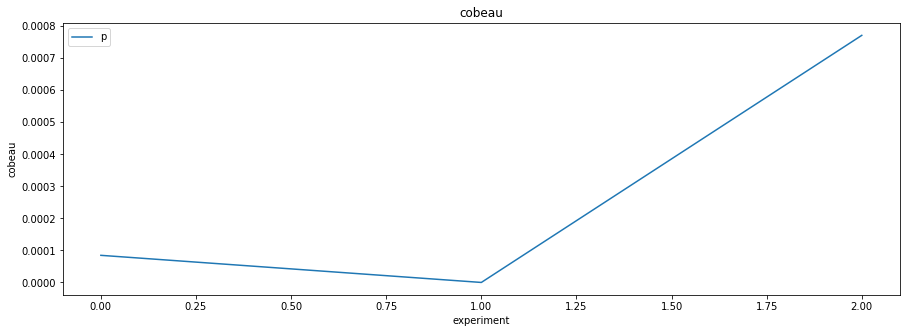

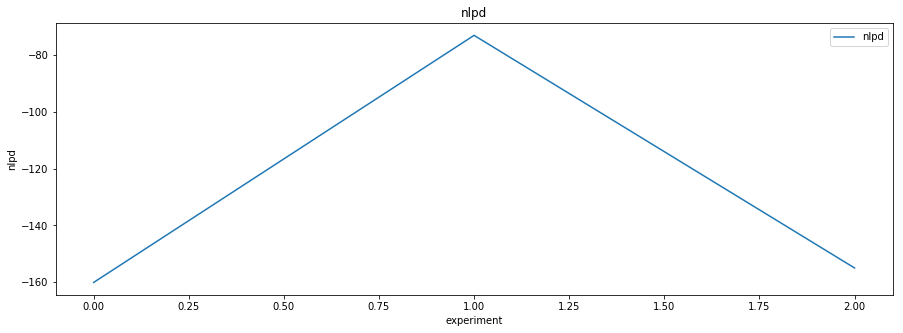

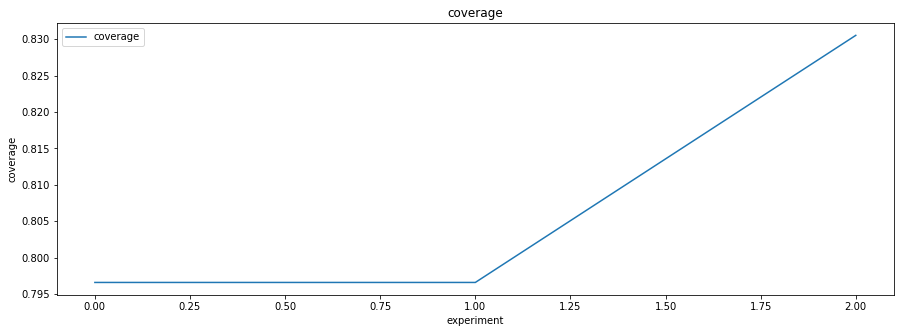

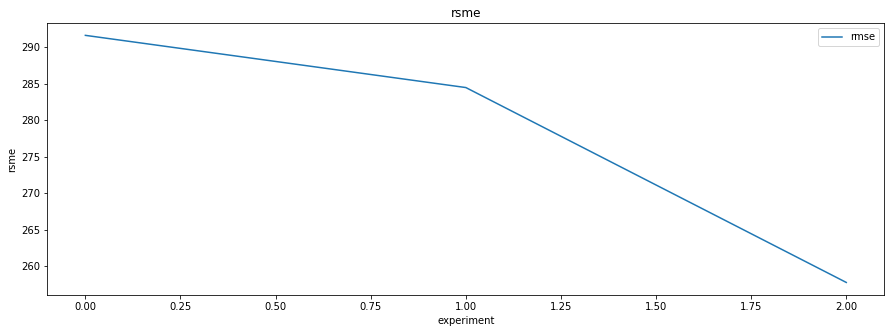

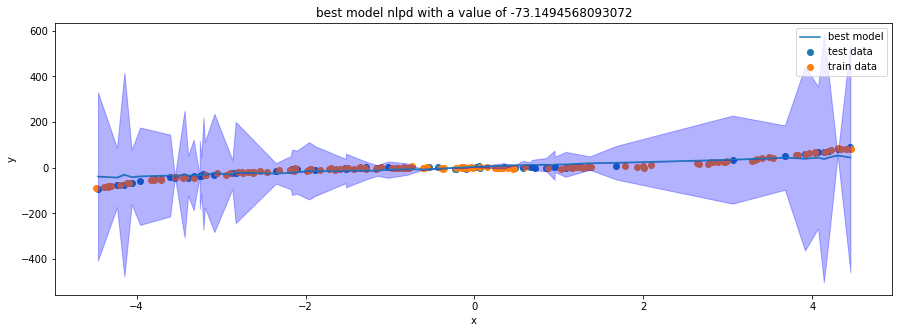

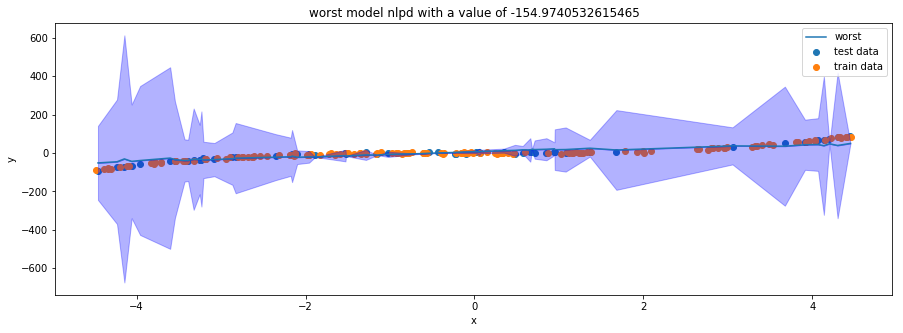

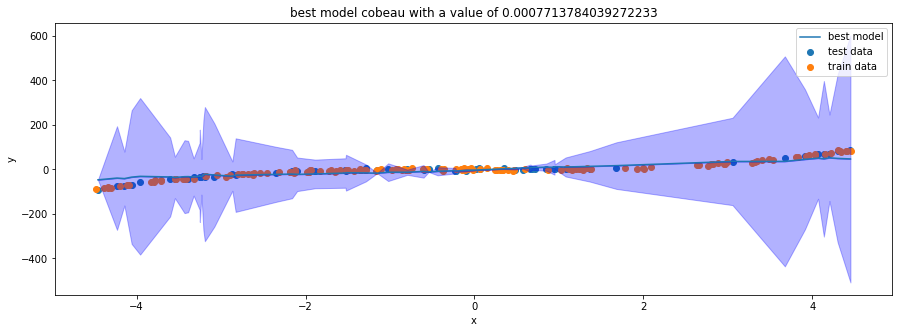

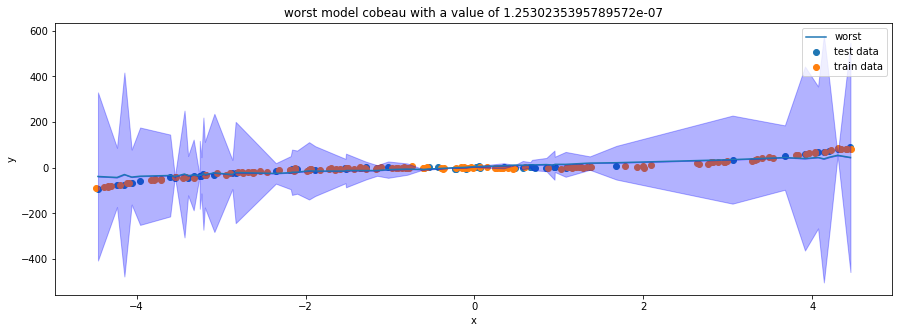

In [11]:


pd111 = repeat_experiment(DropoutNetwork, dataset_creation.XThreeDataset,num_meta_epochs=num_meta_epochs,
                          model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-09 12:58:08.396871
experiment number 1 took 17.667915105819702 seconds. That means the whole run will probably take 53.003745317459106 more seconds and 0.8833957552909851 more minutes.
overall, it took 51.18591284751892 seconds with 3 experiments
             cobeau  coverage           nlpd         rsme
count  3.000000e+00  3.000000       3.000000     3.000000
mean   5.885823e-04  0.564972 -221304.648106   863.775463
std    1.019454e-03  0.423503  383279.792902   324.232041
min    5.514036e-12  0.101695 -663878.031244   549.483716
25%    1.785163e-11  0.381356 -331951.527174   697.108912
50%    3.018923e-11  0.661017     -25.023104   844.734107
75%    8.828734e-04  0.796610     -17.956536  1020.921337
max    1.765747e-03  0.932203     -10.889969  1197.108566
\begin{tabular}{lrrrr}
\toprule
{} &        cobeau &  coverage &           nlpd &         rsme \\
\midrule
count &  3.000000e+00 &  3.000000 &       3.000000 &     3.000000 \\
mean  &  5.885823e-04 &  

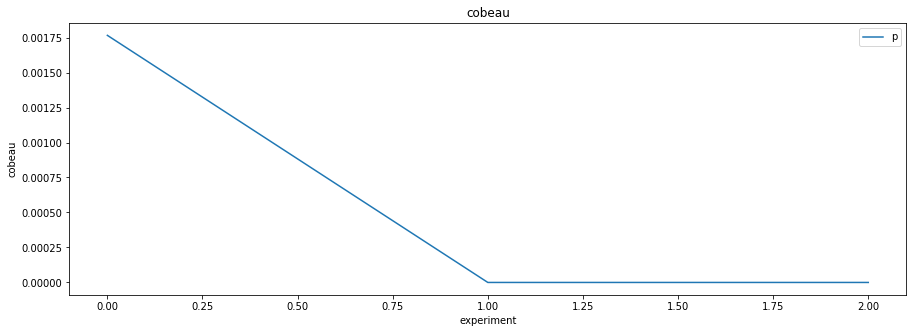

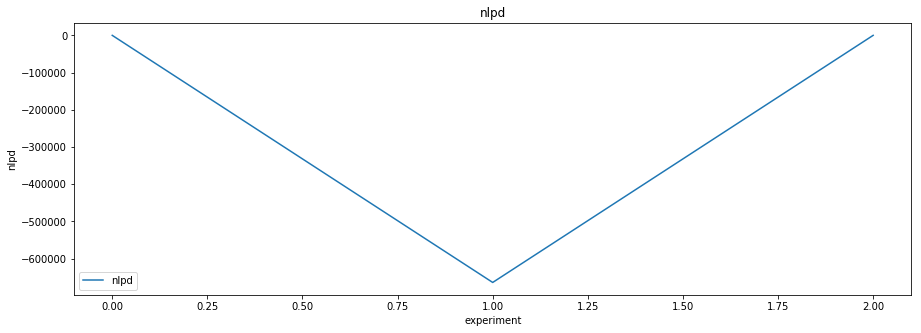

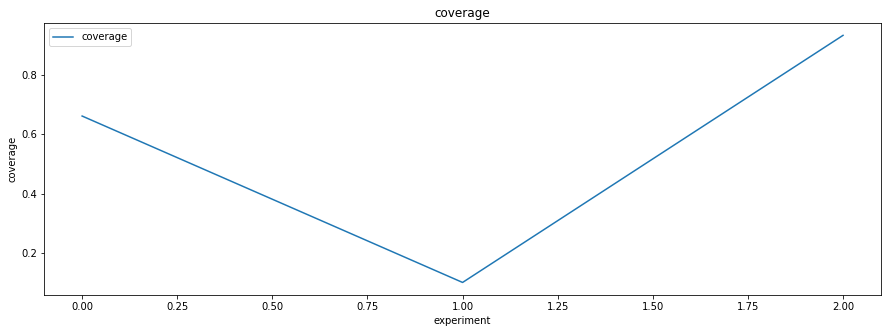

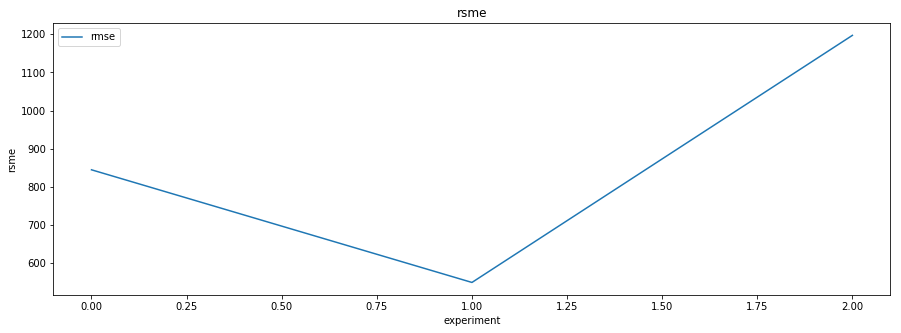

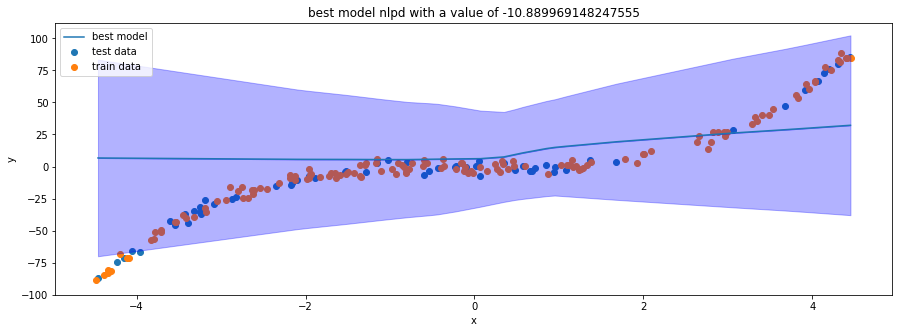

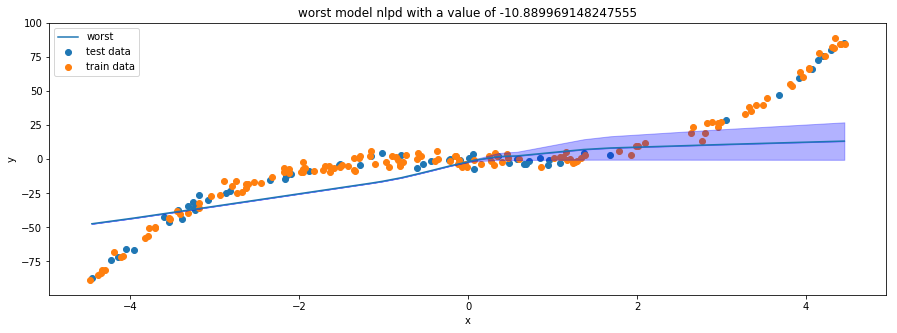

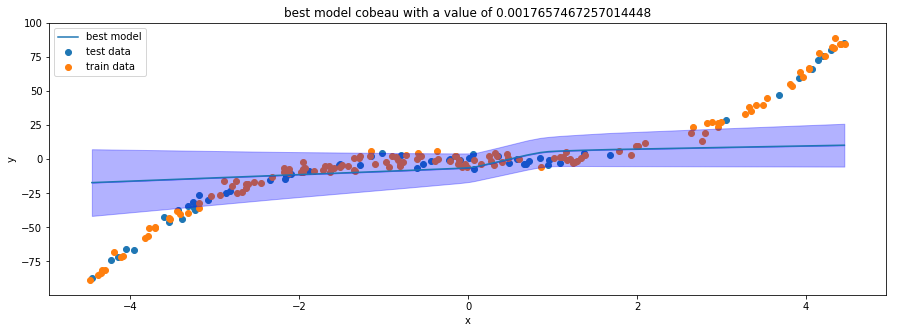

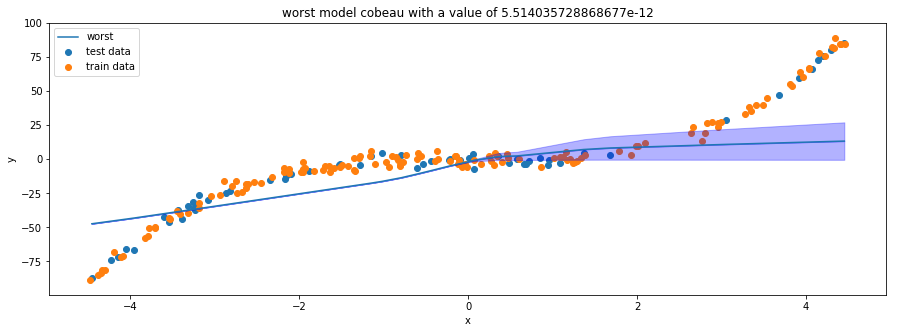

In [12]:
pd222 = repeat_experiment(NlpdNetwork, dataset_creation.XThreeDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-09 12:59:08.440953
experiment number 1 took 11.028862237930298 seconds. That means the whole run will probably take 33.086586713790894 more seconds and 0.5514431118965148 more minutes.
overall, it took 39.91746520996094 seconds with 3 experiments
         cobeau  coverage      nlpd        rsme
count  3.000000  3.000000  3.000000    3.000000
mean   0.041302  0.971751 -4.435388  249.680841
std    0.071531  0.048928  2.573392  167.499624
min    0.000003  0.915254 -7.404315  138.634738
25%    0.000004  0.957627 -5.231122  153.348738
50%    0.000005  1.000000 -3.057930  168.062738
75%    0.061952  1.000000 -2.950925  305.203892
max    0.123899  1.000000 -2.843920  442.345047
\begin{tabular}{lrrrr}
\toprule
{} &    cobeau &  coverage &      nlpd &        rsme \\
\midrule
count &  3.000000 &  3.000000 &  3.000000 &    3.000000 \\
mean  &  0.041302 &  0.971751 & -4.435388 &  249.680841 \\
std   &  0.071531 &  0.048928 &  2.573392 &  167.499624 \\
min   &  0.000003

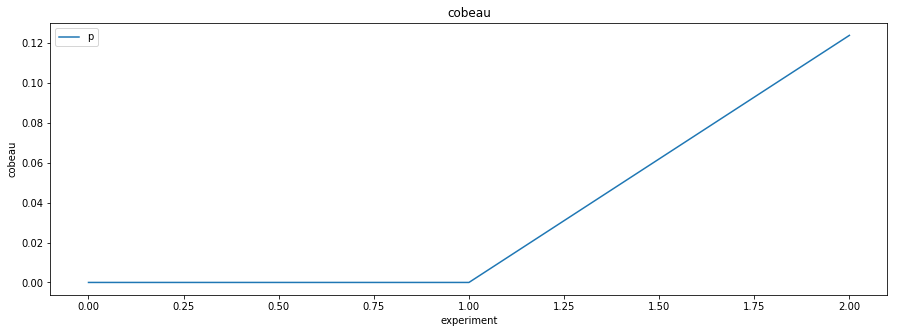

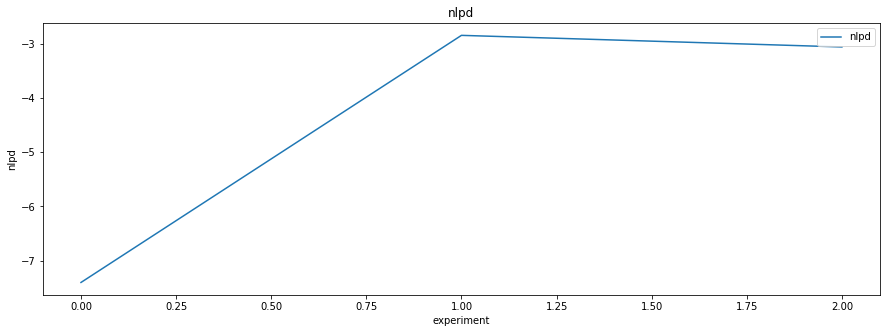

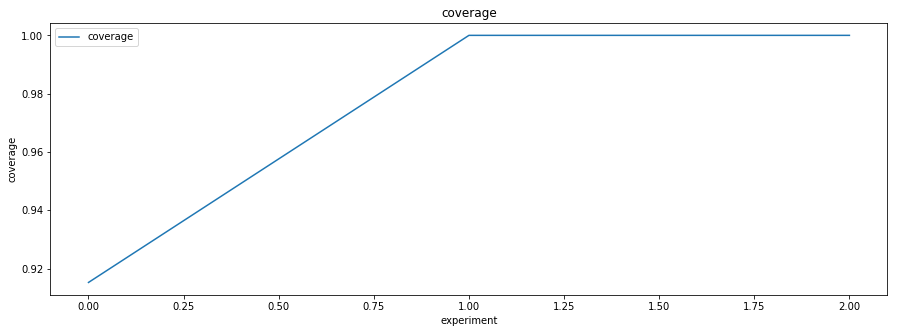

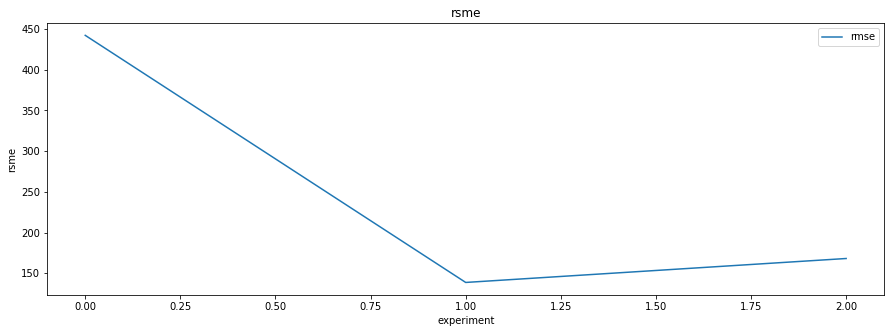

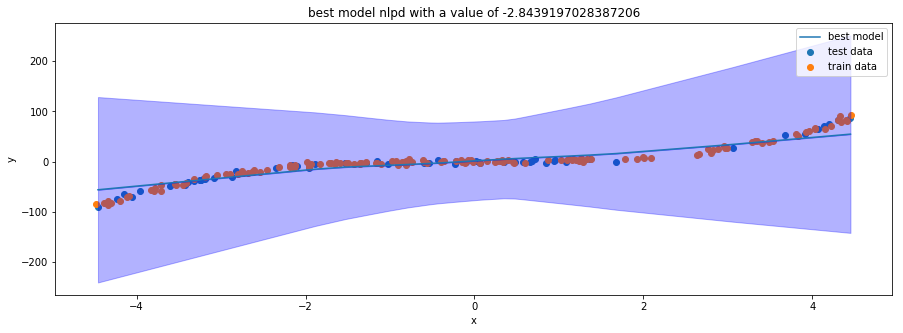

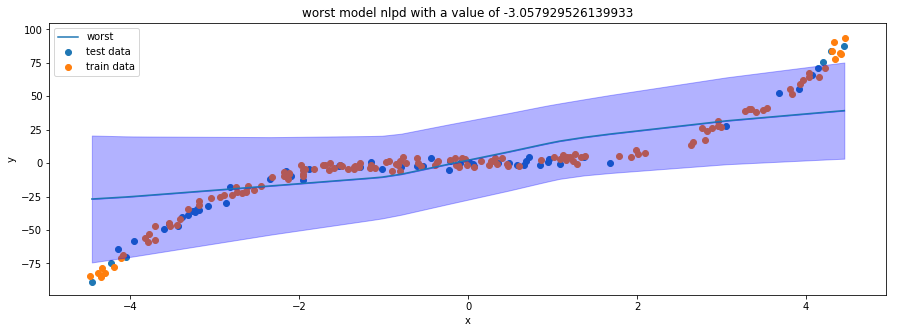

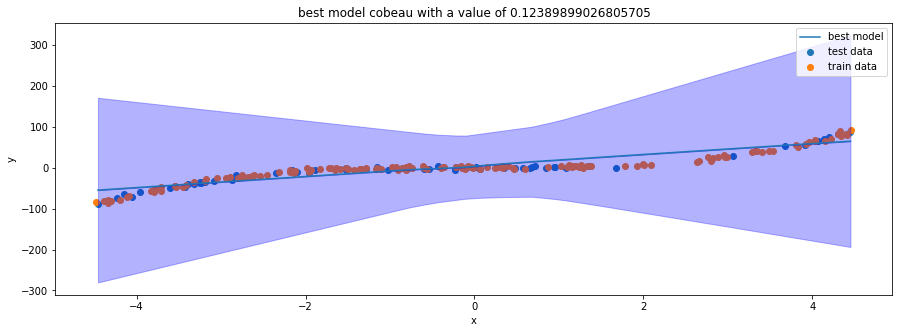

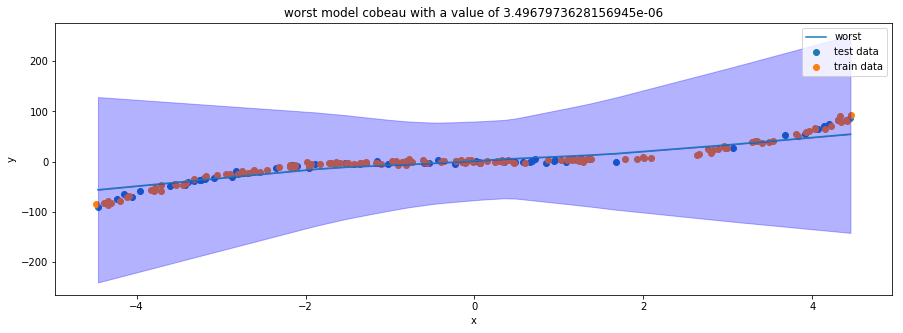

In [13]:
pd333 = repeat_experiment(LrNetwork, dataset_creation.XThreeDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)